# 2020 AIcrowd Seismic Facies Identification Challenge

[https://www.aicrowd.com/challenges/seismic-facies-identification-challenge](https://www.aicrowd.com/challenges/seismic-facies-identification-challenge)

The goal of the Seismic Facies Identification challenge is to create a machine-learning algorithm which, working from the raw 3D image, can reproduce an expert pixel-by-pixel facies identification.

1. Basement/Other: Basement - Low S/N; Few internal Reflections; May contain volcanics in places
2. Slope Mudstone A: Slope to Basin Floor Mudstones; High Amplitude Upper and Lower Boundaries; Low Amplitude Continuous/Semi-Continuous Internal Reflectors
3. Mass Transport Deposit: Mix of Chaotic Facies and Low Amplitude Parallel Reflections
4. Slope Mudstone B: Slope to Basin Floor Mudstones and Sandstones; High Amplitude Parallel Reflectors; Low Continuity Scour Surfaces
5. Slope Valley: High Amplitude Incised Channels/Valleys; Relatively low relief
6. Submarine Canyon System: Erosional Base is U shaped with high local relief.  Internal fill is low amplitude mix of parallel inclined surfaces and chaotic disrupted reflectors.  Mostly deformed slope mudstone filled with isolated sinuous sand-filled channels near the basal surface.

In [1]:
import os
import numpy as np

# Plotting library
from matplotlib import pyplot as plt
from matplotlib import rcParams
from utils import plot_label
from mpl_toolkits.axes_grid1 import make_axes_locatable

rcParams.update({
    'image.cmap'     : 'gray',
    'axes.grid'      : False,
    'savefig.dpi'    : 300,  # to adjust notebook inline plot size
    'axes.labelsize' : 14,  # fontsize for x and y labels (was 10)
    'axes.titlesize' : 14,
    'font.size'      : 14,
    'legend.fontsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'text.usetex'    : False
})

In [2]:
CLASS_NAMES = ["Basement", "SlopeMudA", "Deposit", "SlopeMudB", "SlopeValley", "Canyon"]
num_classes = len(CLASS_NAMES)

In [3]:
dataset = "/nas/home/fpicetti/datasets/aicrowd_facies/"

## Train dataset

In [10]:
image = np.load(os.path.join(dataset, "data_train.npz"), allow_pickle=True, mmap_mode='r')
image =  image['data']
label = np.load(os.path.join(dataset, "labels_train.npz"), allow_pickle=True, mmap_mode='r')
label = label['labels'].astype(np.uint8)-1

In [14]:
print('z\tx\ty')
print('%d\t%d\t%d' % (image.shape[0],image.shape[1],image.shape[2]))

z	x	y
1006	782	590


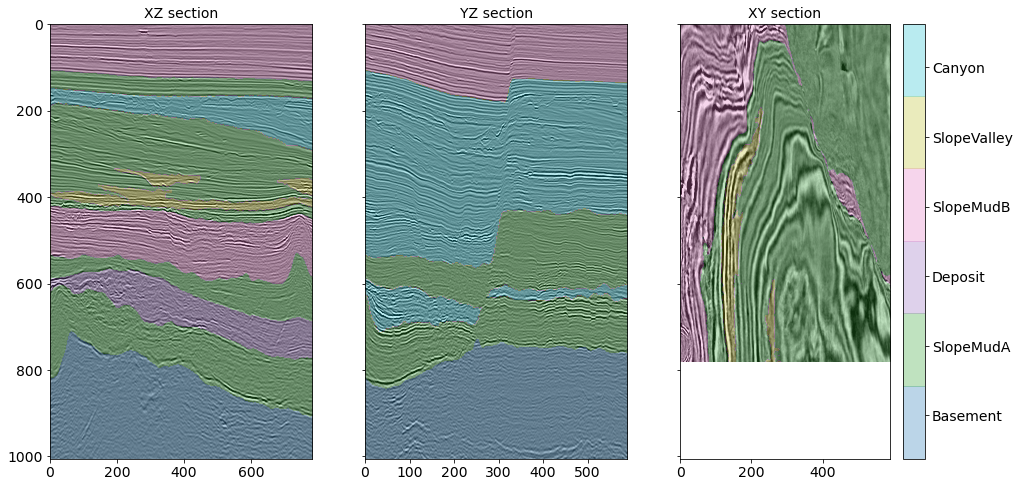

In [29]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 8))

axs[0].imshow(image[:,:,0], clim=(-1000,1000))
plot_label(label[:,:,0], fig, axs[0], num_classes, cmap='tab10', **dict(alpha=0.3))
axs[0].set_title('XZ section')
axs[0].axis('tight')

axs[1].imshow(image[:,0], clim=(-1000,1000))
plot_label(label[:,0], fig, axs[1], num_classes, cmap='tab10', **dict(alpha=0.3))
axs[1].set_title('YZ section')
axs[1].axis('tight')

axs[2].imshow(image[500], clim=(-1000,1000), aspect='equal')
plot_label(label[500], fig, axs[2], num_classes, labels=CLASS_NAMES, cmap='tab10', **dict(alpha=0.3, aspect='equal'))
axs[2].set_title('XY section')
axs[2].axis('tight')

plt.show()

Classes are quite unbalanced!

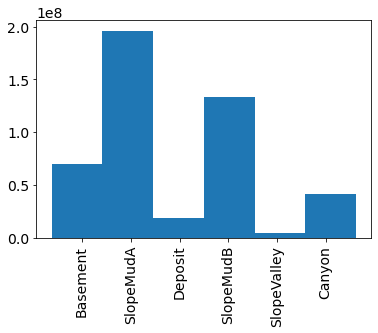

In [18]:
plt.hist(label.ravel(), num_classes)
plt.xticks(np.linspace(0.5,num_classes-1.5,num_classes), CLASS_NAMES, rotation=90)
plt.show()

## Test dataset

In [19]:
image_test = np.load(os.path.join(dataset, "data_test_1.npz"), allow_pickle=True, mmap_mode='r')
image_test = image_test['data']

In [21]:
print('Test Image 1\nz\tx\ty')
print('%d\t%d\t%d' % (image_test.shape[0],image_test.shape[1],image_test.shape[2]))

Test Image 1
z	x	y
1006	782	251


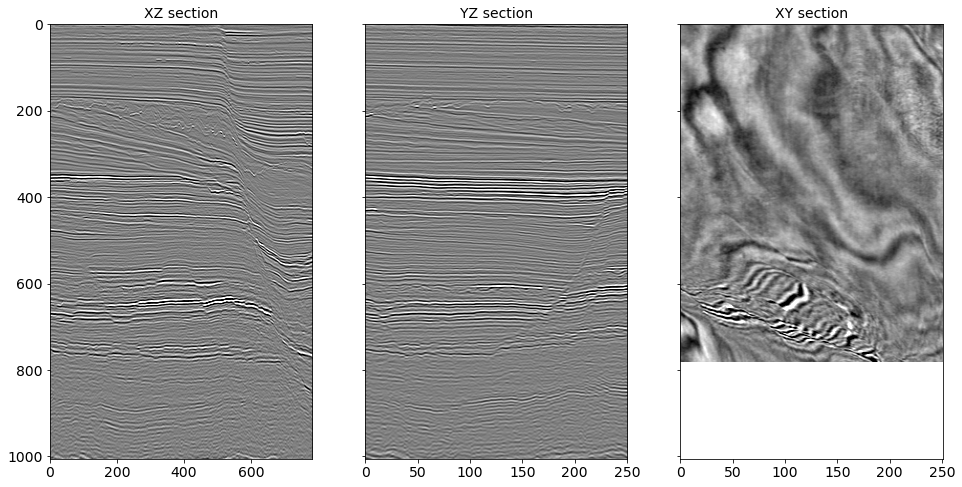

In [30]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 8))

axs[0].imshow(image_test[:,:,0], clim=(-1000,1000))
axs[0].set_title('XZ section')
axs[0].axis('tight')

axs[1].imshow(image_test[:,0], clim=(-1000,1000))
axs[1].set_title('YZ section')
axs[1].axis('tight')

axs[2].imshow(image_test[500], clim=(-1000,1000), aspect='equal')
axs[2].set_title('XY section')
axs[2].axis('tight')

plt.show()